In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'Earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.head()

,S.NO,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


In [17]:
df.Sport.unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'american football / baseball', 'f1',
       'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [ ]:
# The following section will analyze the trend of all years' No.1 ranked athletes 
# with data visualization and interpreration

In [3]:
df_no1 = df[(df.Current_Rank == 1)]
df_no1.head()

,S.NO,Name,Nationality,Current_Rank,Previous_Year_Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,basketball,1994,30.0


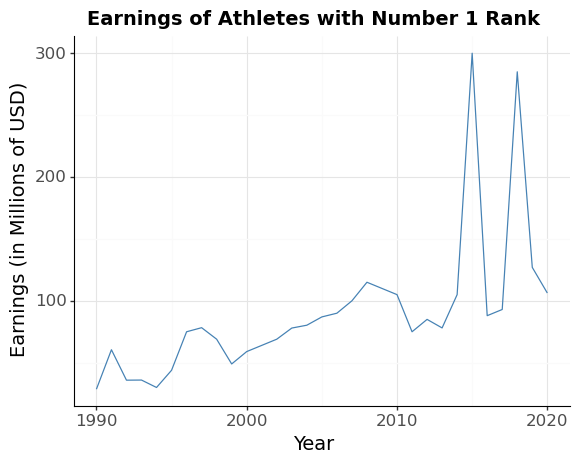

<ggplot: (8785853416810)>

In [16]:
(ggplot(df_no1, aes(x='Year', y='Earnings'))
 + geom_line(color='steelblue')
 + labs(title='Earnings of Athletes with Number 1 Rank', x='Year', y='Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [ ]:
# From the line graph above, we can see a general increasing trend with some outliers
# We can perform a regressional analysis on earnings in years

In [12]:
reg1 = smf.ols('Earnings~Year',df_no1).fit() 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Earnings   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     18.84
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           0.000167
Time:                        17:55:44   Log-Likelihood:                -157.40
No. Observations:                  30   AIC:                             318.8
Df Residuals:                      28   BIC:                             321.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8251.8236   1921.946     -4.293      0.000   -1.22e+04   -4314.896
Year           4.1609      0.959      4.341      0.000       2.198       6.124
==============================================================================
Omnibus:                       32.185   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.620
Skew:                           2.377   Prob(JB):                     1.70e-16
Kurtosis:                       8.958   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_61671/1820395499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


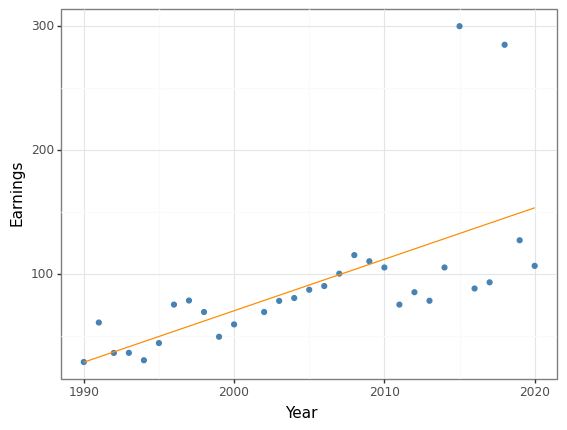

<ggplot: (8785853401751)>

In [15]:
df_no1['reg1_pred_earning']=reg1.predict() 

(ggplot(df_no1, aes(x='Year', y='Earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='Year', y='reg1_pred_earning'), color='darkorange')+ theme_bw()
)

In [ ]:
# We can see an overall increase trend predicted by regression 1 with a slope of 4.16
# The majority of the earning data fit well with the line, except for two outliers
# By the code below, we can see that both data are from the same boxing athelete Floyd Mayweather
# In 2015, having an earning of 300 million USD; in 2018 having an earning of 285 million USD
# Both deviates far from the predicted earning by regression 1

In [24]:
df_no1.sort_values(by='Earnings', inplace=True, ascending=False)
print(df_no1.iloc[0])
print(df_no1.iloc[1])

S.NO                               242
Name                  Floyd Mayweather
Nationality                        USA
Current_Rank                         1
Previous_Year_Rank                   1
Sport                           boxing
Year                              2015
Earnings                         300.0
reg1_pred_earning            132.45118
Name: 241, dtype: object
S.NO                               272
Name                  Floyd Mayweather
Nationality                        USA
Current_Rank                         1
Previous_Year_Rank                >100
Sport                           boxing
Year                              2018
Earnings                         285.0
reg1_pred_earning           144.933971
Name: 271, dtype: object


/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_61671/3518612345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


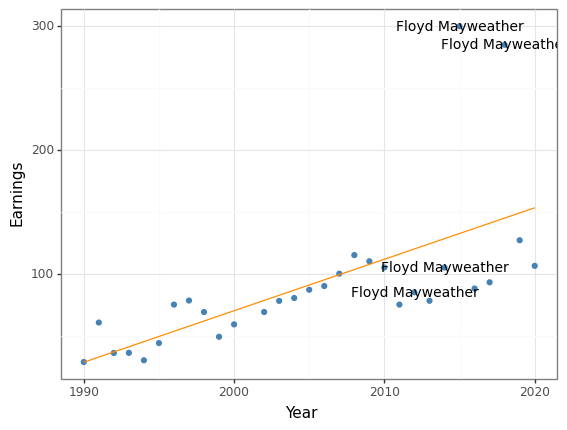

<ggplot: (8785855645356)>

In [32]:
(ggplot(df_no1, aes(x='Year', y='Earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='Year', y='reg1_pred_earning'), color='darkorange')+ theme_bw()+
 geom_text(aes(x='Year', y='Earnings', label='Name'),
         color='black', size=10,
         data=df_no1.loc[(df_no1['Name']=='Floyd Mayweather')])
)

In [ ]:
# We can then explore the scatterplot with out the regression line, since we have identified outliers. 

In [34]:
df_no1['Nationality'].unique()

array(['USA', 'Argentina', 'Switzerland', 'Portugal', 'Germany'],
      dtype=object)

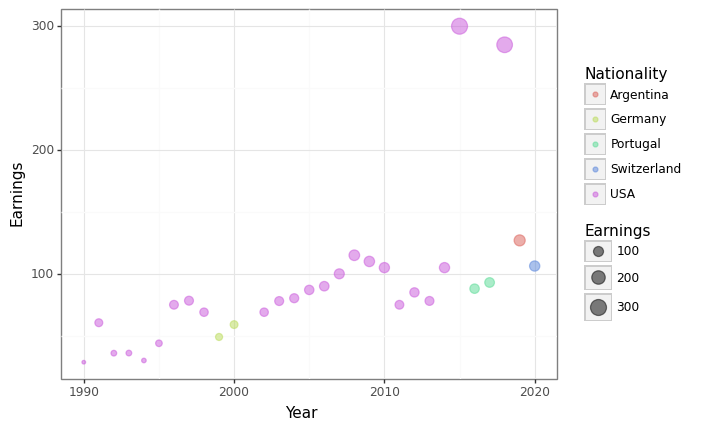

<ggplot: (8785855844636)>

In [35]:
(ggplot(df_no1, mapping=aes(x='Year', y='Earnings',color='Nationality',size='Earnings'))+
geom_point(alpha = 0.5)+
theme_bw()
)

In [ ]:
# From this visualization, we can see that the majority of No.1 ranked athletes from 1990 to 2020 are from USA. 
# According to the dataset, No.1 players are only from 5 countries, as indicated above. 